In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [6]:
train_df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [7]:
train_df["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

Investigating the height distribution versus those who survived/did not survive

<AxesSubplot:xlabel='Age', ylabel='Count'>

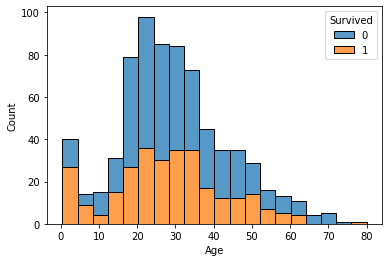

In [8]:
sns.histplot(data=train_df, x="Age", hue="Survived", multiple="stack")

**Observation**
It seems there was an almost 50% survival rate per age bin

<AxesSubplot:xlabel='Sex', ylabel='Count'>

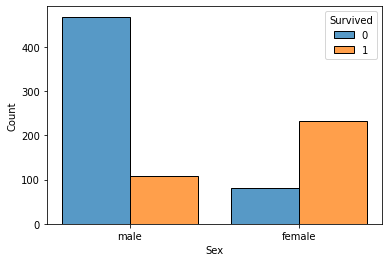

In [9]:
sns.histplot(data=train_df, x="Sex", hue="Survived", multiple="dodge", shrink=.8)

It seems like more male passengers died than females. Also the number of males on board the ship was higher than that of females

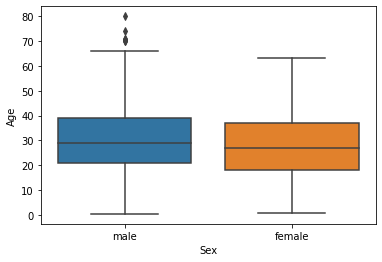

In [10]:
#Boxplotting Age
ax = sns.boxplot(x="Sex", y="Age", data = train_df)

It seems there are some outliers in the Male Ages, so we will use median to fill in missing values

In [11]:
#Copies of train_df and test_df
train_tr = train_df.copy()
test_tr = test_df.copy()

In [12]:
train_tr['Age'].fillna(train_tr['Age'].median(), inplace=True)
test_tr['Age'].fillna(test_tr['Age'].median(), inplace=True)

train_tr.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

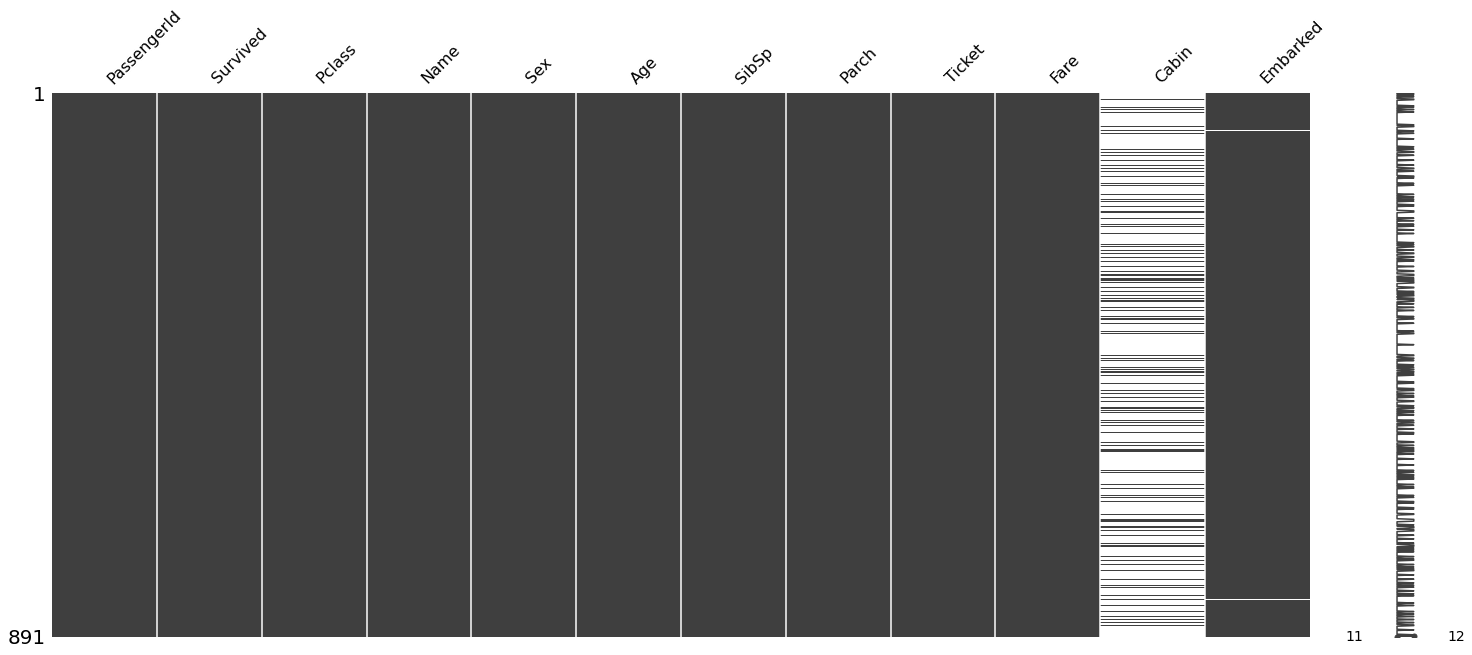

In [13]:
#Lets have a look at the missing values matrix
msno.matrix(train_tr)

Embarked column has 2 missing values, but Cabin has a lot of missing values.

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

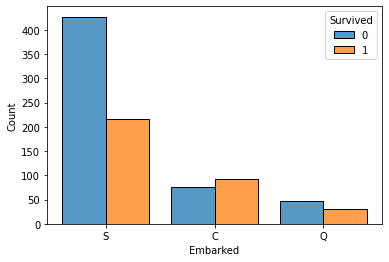

In [14]:
sns.histplot(data=train_tr, x="Embarked", hue="Survived", multiple="dodge", shrink=.8)

Further EDA to see relationships between the features, and also to the targetted label.

Text(0.5, 1.0, 'Age by Passenger Class, Titanic')

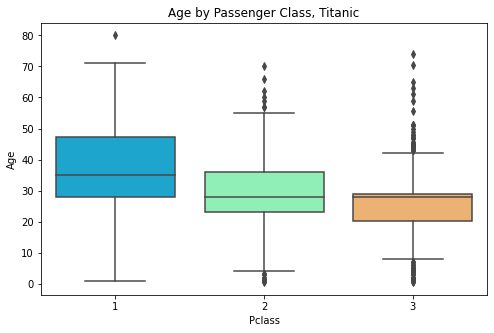

In [15]:
#Relationship between age and passenger class
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass',y='Age',data=train_tr, palette='rainbow')
plt.title("Age by Passenger Class, Titanic")

Generally, Passenger Classes differ by age group

<Figure size 576x864 with 0 Axes>

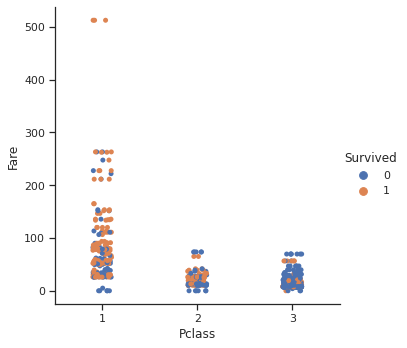

In [16]:
plt.figure(figsize=(8,12))
sns.set_theme(style="ticks")
sns.catplot(data=train_tr, x="Pclass", y="Fare", hue="Survived")

Those who paid higher fares were place in Pclass 1, Pclass 2 seems to be the middle class. Consequently, a higher proportion of those in Pclass 3 (the lowest class) died as compared to the other classes.